In [22]:
from data import cifar10, swiss_roll_data, get_word2vec_data, plot_swiss_roll, word_embedding_plot, cifar10_latent_plot
from model import VAE
from train import train_vae, train_resnet18
import torch
import torchvision
import numpy as np
import gensim
import matplotlib.pyplot as plt

In [2]:
# this may takes 1 min.
nr_samples = 5000
loader, embedding, words, gensim_model = get_word2vec_data(split=[nr_samples, 1000, 1000], seed=3407, batch_size=32)
train_loader, val_loader, test_loader = loader
train_embeddings, val_embeddings, test_embeddings = embedding
train_words, val_words, test_words = words

C:\Users\huwenbin/gensim-data


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


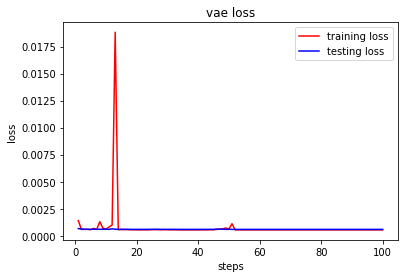

In [3]:
vae = VAE(input_dimension=300, hidden_dims=256, latent_dims=2)
train_vae(100, vae, train_loader, test_loader, lr=0.001)

In [24]:
countries = ['China', 'Russia', 'Japan', 'Turkey', 'Poland', 'Germany', 'France', 'Italy', 'Greece', 'Spain', 'Portugal']
capitals = ['Beijing', 'Moscow', 'Tokyo', 'Ankara', 'Warsaw', 'Berlin', 'Paris', 'Athens', 'Rome', 'Madrid', 'Lisbon']
embeddings = [gensim_model[word] for word in countries + capitals]
embeddings = np.array(embeddings)
embeddings = torch.tensor(embeddings)

dim_red_em = vae.encoder(embeddings).detach().numpy()

word_embedding_plot(dim_red_em, countries + capitals)
# plt.arrow(dim_red_em[0, 0], dim_red_em[0, 1], dim_red_em[0, 0]-dim_red_em[0, 0], dim_red_em[0, 1]-dim_red_em[0, 1], head_width = 0.05)
for i in range(len(countries)):
    country = dim_red_em[i]
    capital = dim_red_em[i+len(countries)]
    print(countries[i], capitals[i])
    plt.arrow(country[0], country[1], capital[0]-country[0], capital[1]-country[1], head_width = 0.05)

China Beijing
Russia Moscow
Japan Tokyo
Turkey Ankara
Poland Warsaw
Germany Berlin
France Paris
Italy Athens
Greece Rome
Spain Madrid
Portugal Lisbon


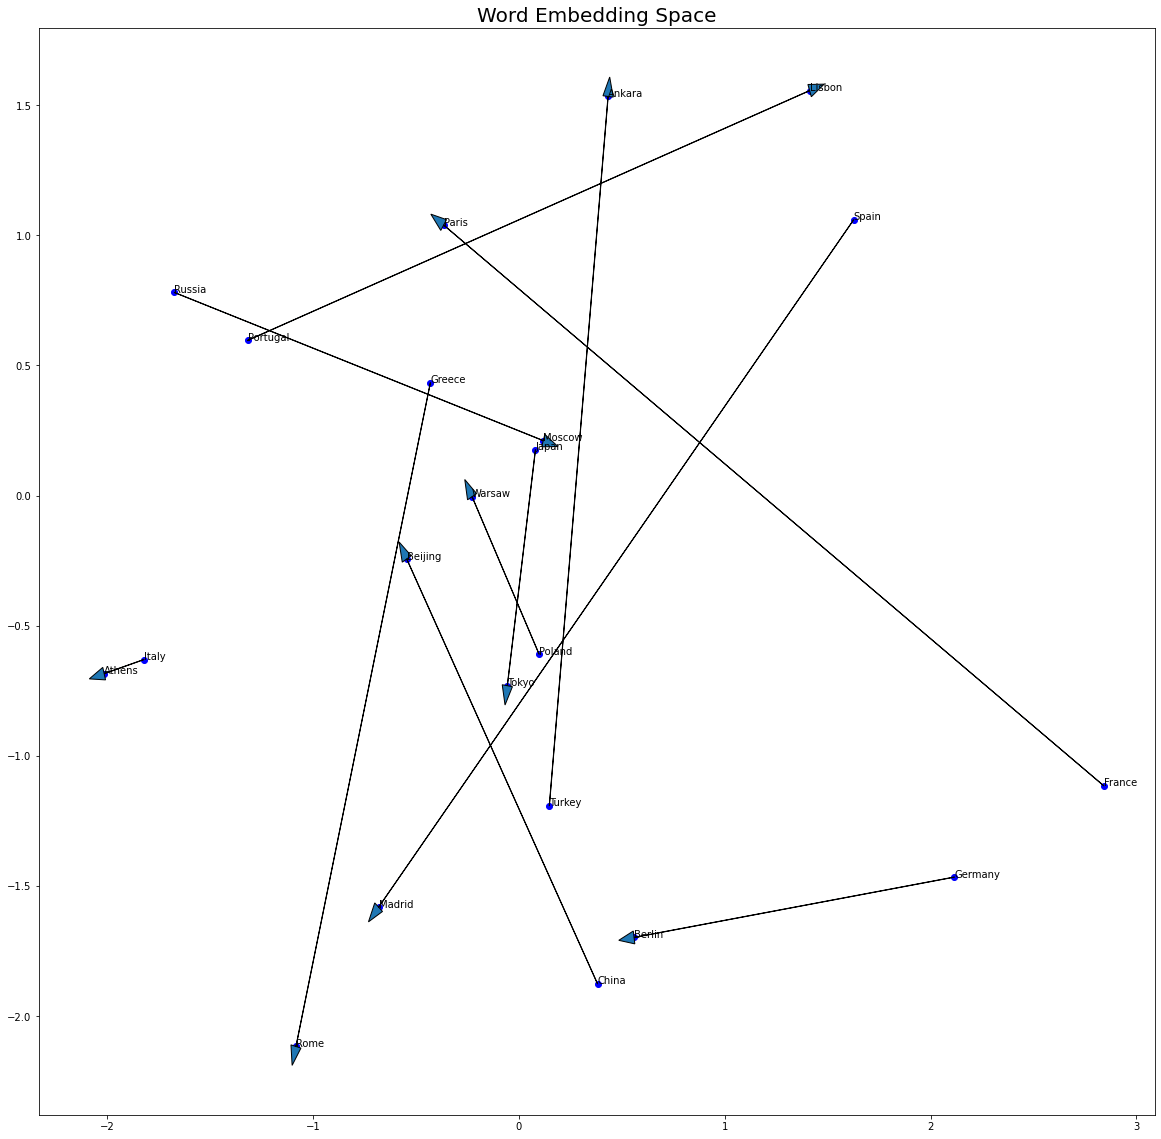

In [50]:
word_embedding_plot(dim_red_em, countries + capitals)
# plt.arrow(dim_red_em[0, 0], dim_red_em[0, 1], dim_red_em[0, 0]-dim_red_em[0, 0], dim_red_em[0, 1]-dim_red_em[0, 1], head_width = 0.05)
for i in range(len(countries)):
    country = dim_red_em[i]
    capital = dim_red_em[i+len(countries)]
    print(countries[i], capitals[i])
    plt.arrow(country[0], country[1], capital[0]-country[0], capital[1]-country[1], head_width = 0.05)